Getting Started with Images
This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

Reading an image
Check image attributes like datatype and shape
Matrix representation of an image in Numpy
Color Images and splitting/merging image channels
Displaying images using matplotlib
Saving images 

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [74]:
#Display 18x18 pixel img
Image(filename=r"C:\OpenCV-Fundamentals\FreeCourse\Materials\checkerboard_18x18.png")


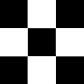

In [75]:
#Display 84x84 pixel img
Image(filename=r"C:\OpenCV-Fundamentals\FreeCourse\Materials\checkerboard_84x84.jpg")


Function Syntax
retval = cv2.imread( filename[, flags] )
retval: Is the image if it is successfully loaded. Otherwise it is None. This may happen if the filename is wrong or the file is corrupt.

The function has 1 required input argument and one optional flag:

filename: This can be an absolute or relative path. This is a mandatory argument.

Flags: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an optional argument with a default value of cv2.IMREAD_COLOR or 1 which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the flags available.

Flags

cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [76]:
# Read image as gray scale.
cb_img = cv2.imread(r"C:\OpenCV-Fundamentals\FreeCourse\Materials\checkerboard_18x18.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [ ]:
# print the size  of an image
print("Image size (H,W) is: ", cb_img.shape)

# print the data-type of an image
print("Data Type is: ", cb_img.dtype)

Image size (H,W) is:  (18, 18)
Data Type is:  uint8


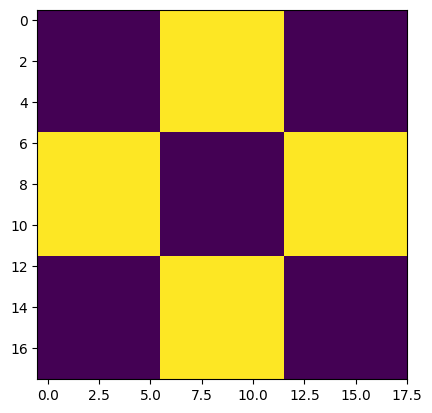

In [38]:
# Display image.
plt.imshow(cb_img)

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using imshow(). matplotlib uses different color maps and it's possible that the gray scale color map is not set.

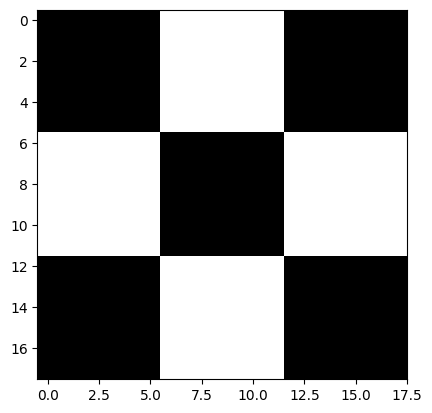

In [ ]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")


[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

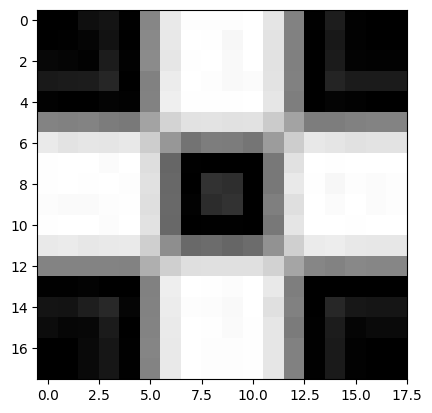

In [77]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread(r"C:\OpenCV-Fundamentals\FreeCourse\Materials\checkerboard_fuzzy_18x18.jpg", 0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap="gray")

Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

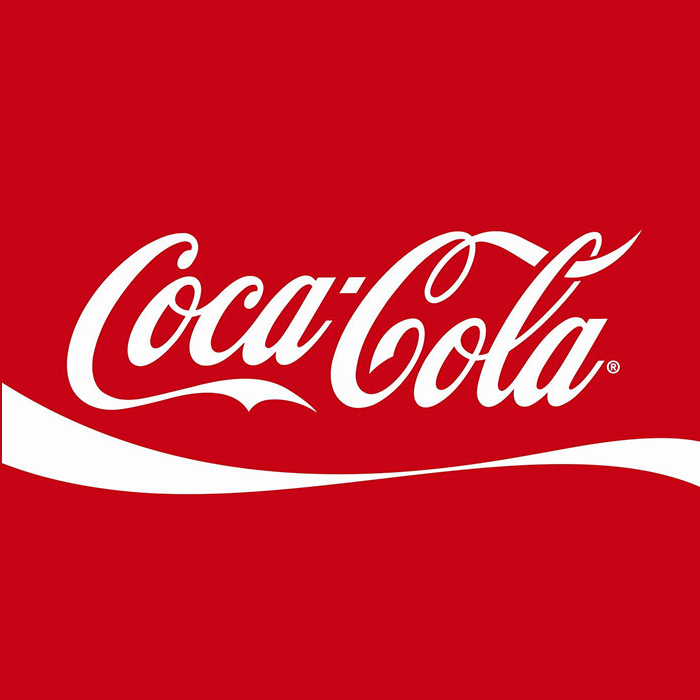

In [78]:
Image(r"C:\OpenCV-Fundamentals\FreeCourse\Materials\coca-cola-logo.png")

In [86]:
# Read in image
coke_img = cv2.imread(r"C:\OpenCV-Fundamentals\FreeCourse\Materials\coca-cola-logo.png", 1)


# print the size  of image
# C is the number of channels, in this case, 3 
h, w, c = coke_img.shape
print("Image size (H, W, C) is:", h, w, c)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: 700 700 3
Data type of image is: uint8


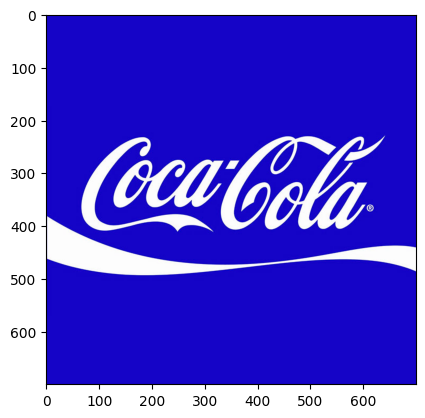

In [50]:
plt.imshow(coke_img)
#  What happened?

The color displayed above is different from the actual image. 
This is because matplotlib expects the image in 
    -   RGB format 
Whereas OpenCV stores images in 
    -   BGR format. 
    
Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

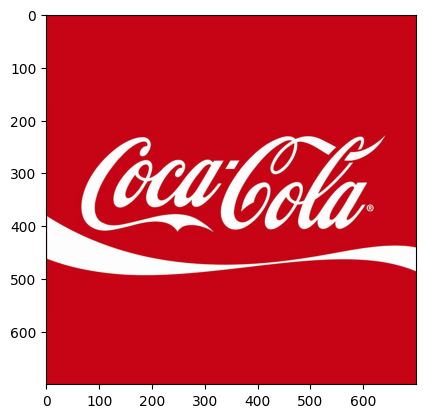

In [ ]:
#Slicing in Numpy Style
#   :	all elements	[0:end:1]	Selects all items from start to end, moving forward by 1 step
#   ::	all elements (explicit)	[0:end:1]	Same as :, but makes all parts of the slice explicit
#   [::-1]	all elements in reverse order	[end:0:-1]	Selects all items from end to start (reverse), moving backward by 1 step
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

Splitting and Merging Color Channels
cv2.split() Divides a multi-channel array into several single-channel arrays.

cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Original Image')

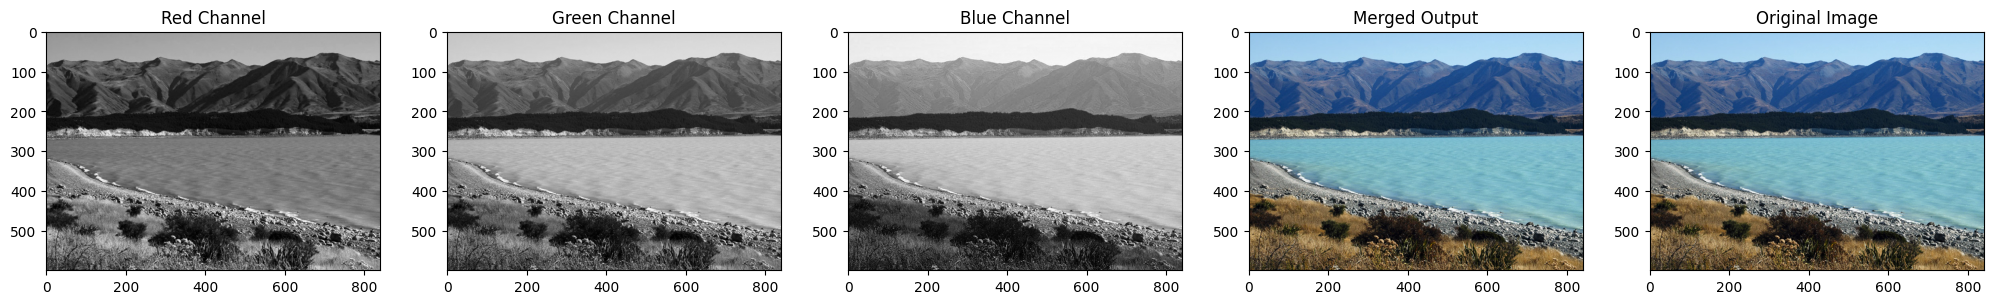

In [94]:
# Split the image into the B,G,R components, IMREAD_COLOR always converts an image to the 3 channel BGR color image
img_NZ_bgr = cv2.imread(r"C:\OpenCV-Fundamentals\FreeCourse\Materials\New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[25, 5])

plt.subplot(151);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(152);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(153);plt.imshow(b, cmap="gray");plt.title("Blue Channel")


# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(154)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")


plt.subplot(155)
plt.imshow(img_NZ_bgr[:, :, ::-1])
plt.title("Original Image")



Converting to different Color Spaces
cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

Function Syntax
dst = cv2.cvtColor( src, code )
dst: Is the output image of the same size and depth as src.

The function has 2 required arguments:

src input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

code color space conversion code (see ColorConversionCodes).

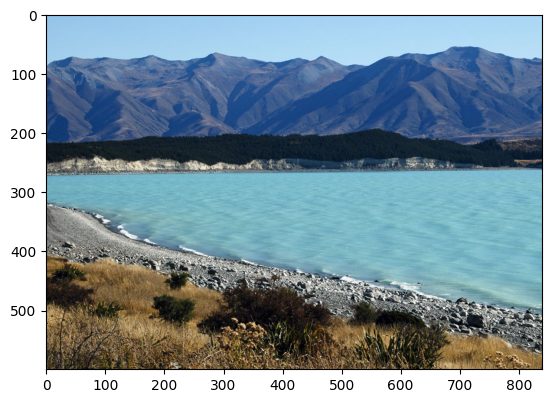

In [95]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

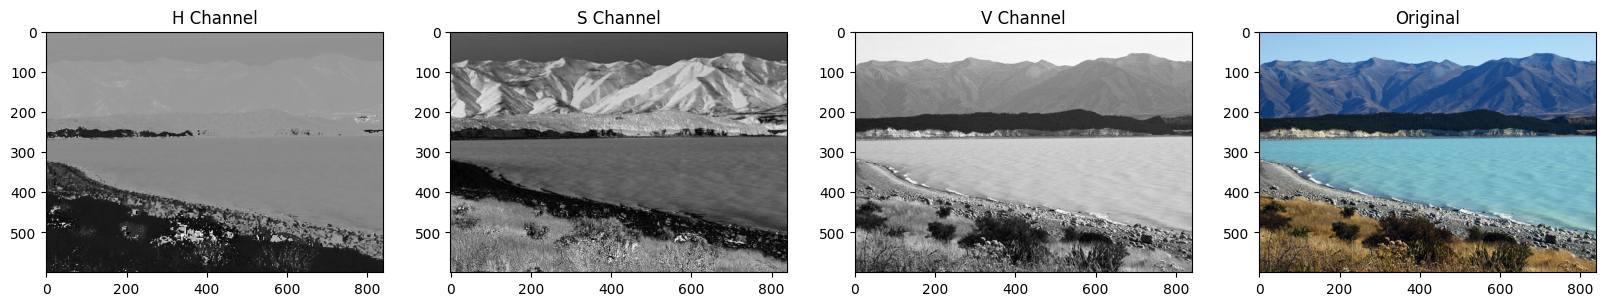

In [ ]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the H,S,V components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

Modifying individual Channel

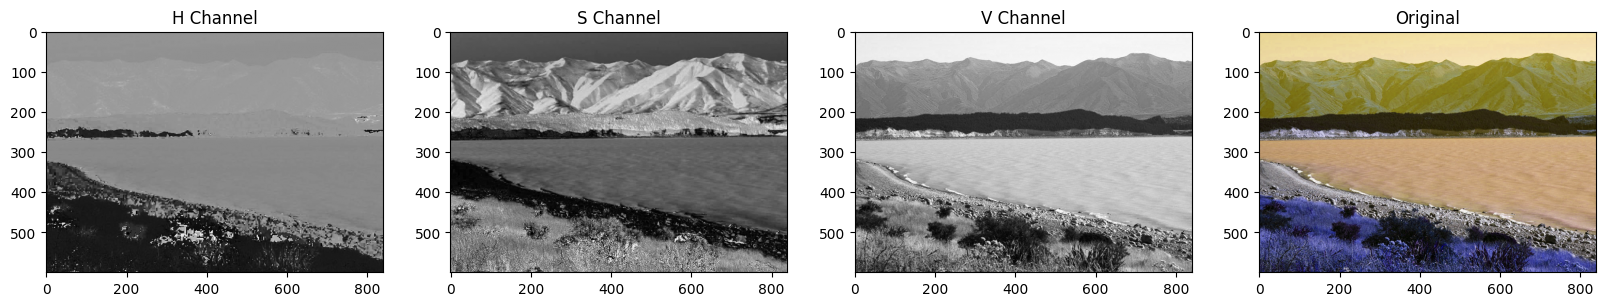

In [102]:
h_new = h + 100
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

Saving Images
Saving the image is as trivial as reading an image in OpenCV. We use the function cv2.imwrite() with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

Function Syntax
cv2.imwrite( filename, img[, params] )
The function has 2 required arguments:

filename: This can be an absolute or relative path.

img: Image or Images to be saved.

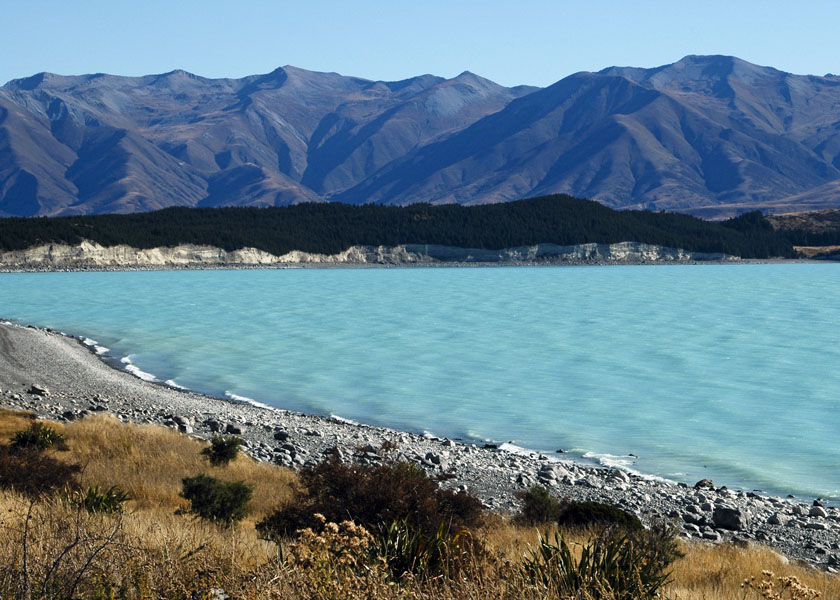

In [110]:
# save the image
cv2.imwrite("../Materials/New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png') 

In [112]:
# read the image as Color
img_NZ_bgr = cv2.imread("../Materials/New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("../Materials/New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W) is: (600, 840)
